In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist #import dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #split it into train set and test set.
X_train = tf.keras.utils.normalize(X_train, axis= 1)
X_test = tf.keras.utils.normalize(X_test, axis= 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape= (28, 28)))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
# fitting model
model.fit(X_train, y_train, epochs= 5)

# evaluate
loss, accuracy = model.evaluate(X_test, y_test)

model.save('handwrittendigit.keras')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8580 - loss: 0.4784
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9647 - loss: 0.1149
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9781 - loss: 0.0739
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0520
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0368
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9685 - loss: 0.1063


In [ ]:
# libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import tempfile

# Corrected function to classify the image
def classify_digit(model, image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))
    img = np.array(img)  # Convert to a numpy array
    img = img.reshape(1, 28, 28, 1)  # Reshape to match the model's input shape
    img = img.astype('float32') / 255.0  # Normalize to range [0, 1]
    prediction = model.predict(img)
    return prediction

# Function to resize the image (for display purposes)
def resize_image(image, target_size):
    resized_image = image.resize(target_size)
    return resized_image

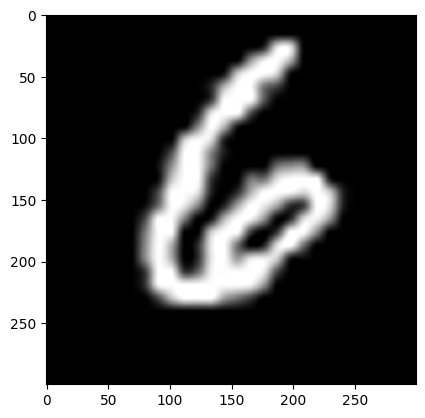

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
The digit is probably a 6


In [ ]:
# libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import tempfile

# Corrected function to classify the image
def classify_digit(model, image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))
    img = np.array(img)  # Convert to a numpy array
    img = img.reshape(1, 28, 28, 1)  # Reshape to match the model's input shape
    img = img.astype('float32') / 255.0  # Normalize to range [0, 1]
    prediction = model.predict(img)
    return prediction

# Function to resize the image (for display purposes)
def resize_image(image, target_size):
    resized_image = image.resize(target_size)
    return resized_image

# Load image from file
image_path = './sample_data/6.png'  # Replace with the actual path to your image
uploaded_image = Image.open(image_path).convert('L')  # Convert image to grayscale

if uploaded_image is not None:

    image_np = np.array(uploaded_image)

    temp_image_path = os.path.join(tempfile.gettempdir(), 'temp_image.png')
    cv2.imwrite(temp_image_path, image_np)

    resized_image = resize_image(uploaded_image, (300, 300))

    # Display the resized image using matplotlib (install matplotlib if you haven't already)
    import matplotlib.pyplot as plt
    plt.imshow(resized_image, cmap='gray')
    plt.show()

    # Load the pre-trained model
    model = tf.keras.models.load_model('handwrittendigit.keras')

    # Classify the new image
    prediction = classify_digit(model, temp_image_path)

    # Print the prediction result
    print(f'The digit is probably a {np.argmax(prediction)}')

    os.remove(temp_image_path)

